## Decision Boundary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# %%writefile -a plot.py


def plot_decision_regions(
    X, y, classifier, figsize=(8, 6), resolution=0.01, cmap=plt.cm.cool
):
    """
    Plot decision regions of a classifier.
    `X`: feature matrix
    `y`: target vector
    `classifier`: trained classifier
    `figsize`: figure size
    `resolution`: resolution of the meshgrid
    `cmap`: color map

    Example usage: `plot_decision_regions(X_train, y_train, classifier)`
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step=resolution),
        np.arange(y_min, y_max, step=resolution),
    )
    Z = classifier.predict(
        np.c_[xx.ravel(), yy.ravel()]  # ~ np.array([xx.ravel(), yy.ravel()]).T
    )
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors="k", marker="o", s=50)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

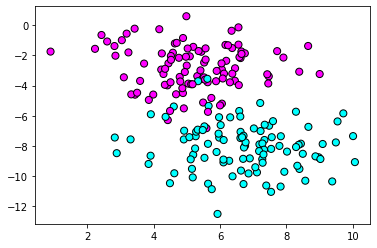

In [55]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=2,
    random_state=44,
    cluster_std=1.5,
)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train a classifier
classifier = SVC(kernel="linear", C=10)
classifier.fit(X_train, y_train)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool, edgecolors="k", marker="o", s=50)

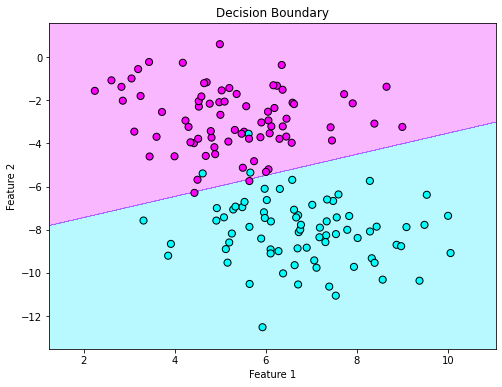

In [66]:
# Example usage:
plot_decision_regions(X_train, y_train, classifier)